In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Accuracy of HMC vs. VA for CPL/Ridge

In [28]:
# load HMC results
all_thetas = np.load('../../data/commaai/mcmc/filtered_gaussian_resampled/Ridge/all_thetas_L100_3000.npy')
# load VA results
lower_bounds = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/lower_bounds_factor_4_50.npy')
mu_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/mu_ts23_factor_4_50.npy')
B_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/B_ts23_factor_4_50.npy')
d_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/d_ts23_factor_4_50.npy')

In [29]:
# take last 1% of VA results
iterations = len(lower_bounds)
mu_t = np.mean(mu_ts[int(0.9*iterations):iterations,:], axis = 0)
B_t = np.mean(B_ts[int(0.9*iterations):iterations,:], axis = 0)
d_t = np.mean(d_ts[int(0.9*iterations):iterations,:], axis = 0)
var = np.sqrt(np.diag(B_t.dot(B_t.T) + d_t**2))
samples_tau = np.exp(np.random.normal(mu_t[10], var[10], 100000))
#var[10] = np.std(samples_tau)
mu_t[10] = np.mean(samples_tau)
# take results for HMC after burnin
burnin = 500
# transform log tau
all_thetas2 = all_thetas.copy()
all_thetas2[:,10] = np.exp(all_thetas[:,10])
mu_hmc = np.mean(all_thetas2[500:,:], axis = 0)
std_hmc = np.std(all_thetas[500:,:], axis = 0)

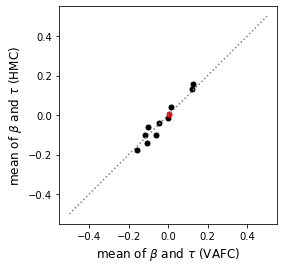

In [30]:
plt.scatter(mu_t[0:10], mu_hmc[0:10], color = 'black', s = 25)
plt.scatter(mu_t[10], mu_hmc[10], color = 'red', s = 25)
plt.plot([-.5,.5], [-.5,.5], color = 'grey', linestyle = ':')
plt.xlabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CPL_Ridge_means.pdf', dpi = 600, bbox_inches='tight') 

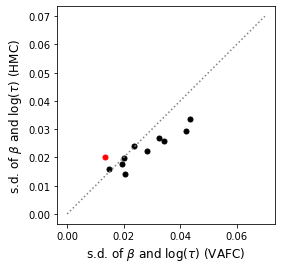

In [31]:
plt.scatter(var[0:10], std_hmc[0:10], color = 'black', s = 25)
plt.scatter(var[10], std_hmc[10], color = 'red', s = 25)
plt.plot([0,.07], [0,.07], color = 'grey', linestyle = ':')
plt.xlabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CPL_Ridge_sd.pdf', dpi = 600, bbox_inches='tight') 

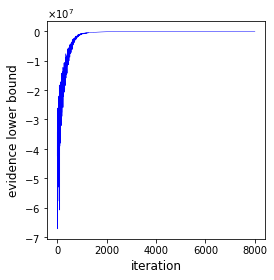

In [32]:
fig, ax = plt.subplots()
ax.plot(lower_bounds[0:8000], color = 'blue', linewidth = '0.5')
ax.set_ylabel('evidence lower bound', fontsize = 12)
ax.set_xlabel('iteration', fontsize=12)
ax.set_box_aspect(1)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.major.formatter._useMathText = True
plt.savefig('../../data/commaai/accuracy/CPL_Ridge_convergence.pdf', dpi = 600, bbox_inches='tight') 

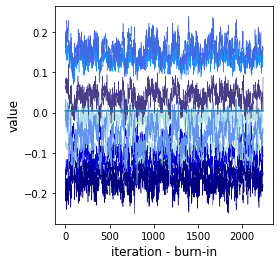

In [33]:
colors = ['azure', 'powderblue', 'darkblue', 'darkslateblue', 'lightblue', 'navy', 'dodgerblue', 'royalblue', 'mediumblue', 'cornflowerblue']
fig, ax = plt.subplots()
for i in range(0,10):
    ax.plot(all_thetas[500:,i], color = colors[i], linewidth = 0.5)
ax.plot(np.exp(all_thetas[500:,10]))
ax.set_box_aspect(1)
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('iteration - burn-in', fontsize=12)
plt.savefig('../../data/commaai/accuracy/CPL_Ridge_hmc_convergence.pdf', dpi = 600, bbox_inches='tight') 

## Accuracy for CIL/Ridge

In [34]:
# load HMC results
all_thetas = np.load('../../data/commaai/mcmc/unfiltered_gaussian_resampled/Ridge/all_thetas_L100_5000.npy')
# load VA results
lower_bounds = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/lower_bounds_factor_50.npy')
mu_ts = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/mu_ts23_factor_50.npy')
B_ts = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/B_ts23_factor_50.npy')
d_ts = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/d_ts23_factor_50.npy')

In [35]:
# take last 1% of VA results
iterations = len(lower_bounds)
mu_t = np.mean(mu_ts[int(0.95*iterations):iterations,:], axis = 0)
B_t = np.mean(B_ts[int(0.95*iterations):iterations,:], axis = 0)
d_t = np.mean(d_ts[int(0.95*iterations):iterations,:], axis = 0)
var = np.sqrt(np.diag(B_t.dot(B_t.T) + d_t**2))
samples_tau = np.exp(np.random.normal(mu_t[10], var[10], 100000))
#var = np.genfromtxt('../../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/Var.csv', delimiter = ',')
#var[10] = np.std(samples_tau)
mu_t[10] = np.mean(samples_tau)
# take results for HMC after burnin
burnin = 100
# transform log tau
all_thetas2 = all_thetas.copy()
all_thetas2[:,10] = np.exp(all_thetas[:,10])
mu_hmc = np.mean(all_thetas2[500:,:], axis = 0)
std_hmc = np.std(all_thetas[500:,:], axis = 0)

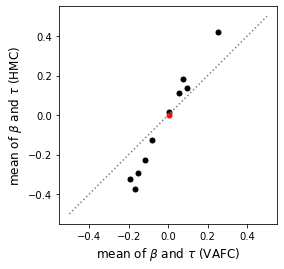

In [36]:
plt.scatter(mu_t[0:10], mu_hmc[0:10], color = 'black', s = 25)
plt.scatter(mu_t[10], mu_hmc[10], color = 'red', s = 25)
plt.plot([-.5,.5], [-.5,.5], color = 'grey', linestyle = ':')
plt.xlabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('mean of ' + r'$\beta$' + ' and ' + r'$\tau$' + ' (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CIL_Ridge_means.pdf', dpi = 600, bbox_inches='tight') 

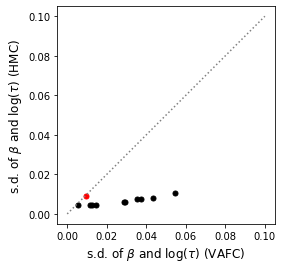

In [37]:
plt.scatter(var[0:10], std_hmc[0:10], color = 'black', s = 25)
plt.scatter(var[10], std_hmc[10], color = 'red', s = 25)
plt.plot([0,.1], [0,.1], color = 'grey', linestyle = ':')
plt.xlabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (VAFC)'), fontsize=12)
plt.ylabel(str('s.d. of ' + r'$\beta$' + ' and ' + r'$\log(\tau)$' + ' (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CIL_Ridge_sd.pdf', dpi = 600, bbox_inches='tight') 

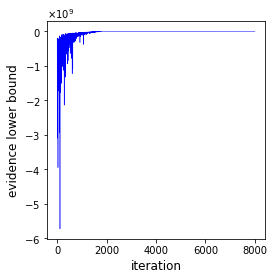

In [38]:
fig, ax = plt.subplots()
ax.plot(lower_bounds[0:8000], color = 'blue', linewidth = '0.5')
ax.set_ylabel('evidence lower bound', fontsize = 12)
ax.set_xlabel('iteration', fontsize=12)
ax.set_box_aspect(1)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.major.formatter._useMathText = True
plt.savefig('../../data/commaai/accuracy/CIL_Ridge_convergence.pdf', dpi = 600, bbox_inches='tight') 

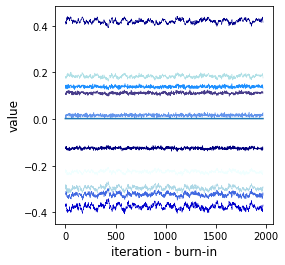

In [39]:
colors = ['azure', 'powderblue', 'darkblue', 'darkslateblue', 'lightblue', 'navy', 'dodgerblue', 'royalblue', 'mediumblue', 'cornflowerblue']
fig, ax = plt.subplots()
for i in range(0,10):
    ax.plot(all_thetas[500:,i], color = colors[i], linewidth = 0.5)
ax.plot(np.exp(all_thetas[500:,10]))
ax.set_box_aspect(1)
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('iteration - burn-in', fontsize=12)
plt.savefig('../../data/commaai/accuracy/CIL_Ridge_hmc_convergence.pdf', dpi = 600, bbox_inches='tight') 

# Accuracy HMC/VA Horseshoe

In [53]:
# load HMC results
all_thetas = np.load('../../data/commaai/mcmc/filtered_gaussian_resampled/Horseshoe/all_thetas_try.npy')
# load VA results
lower_bounds = np.load('../../data/commaai/va/filtered_gaussian_resampled/Horseshoe/lower_bounds2_new_dev.npy')
mu_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Horseshoe/mu_ts2_new_dev.npy')
B_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Horseshoe/B_ts2_new_dev.npy')
d_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Horseshoe/d_ts2_new_dev.npy')

In [54]:
# take last 1% of VA results
iterations = len(lower_bounds)
mu_t = np.mean(mu_ts[int(0.9*iterations):iterations,:], axis = 0)
B_t = np.mean(B_ts[int(0.9*iterations):iterations,:], axis = 0)
d_t = np.mean(d_ts[int(0.9*iterations):iterations,:], axis = 0)
var = np.sqrt(np.diag(B_t.dot(B_t.T) + d_t**2))
samples_lambda = np.exp(0.5*np.random.multivariate_normal(mu_t[10:20].reshape(10,), np.diag(var[10:20]), 100000))
samples_tau = np.exp(np.random.normal(mu_t[20], var[20], 100000))
#var[10] = np.std(samples_tau)
mu_t[10:20] = np.mean(samples_lambda, axis = 0).reshape(10,1)
mu_t[20] = np.mean(samples_tau)
var[10:20] = np.std(samples_lambda, axis = 0).reshape(10)
var[20] = np.std(samples_tau)
# take results for HMC after burnin
burnin = 2000
# transform log tau
all_thetas2 = all_thetas.copy()
all_thetas2[:,20] = np.exp(all_thetas[:,20])
all_thetas2[:,10:20] = np.exp(0.5*all_thetas[:,10:20])
mu_hmc = np.mean(all_thetas2[burnin:,:], axis = 0)
std_hmc = np.std(all_thetas[burnin:,:], axis = 0)

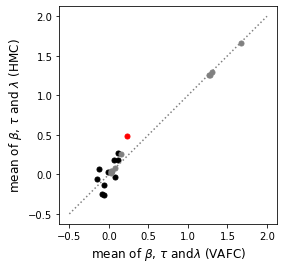

In [55]:
plt.scatter(mu_t[0:10], mu_hmc[0:10], color = 'black', s = 25)
plt.scatter(mu_t[10:20], mu_hmc[10:20], color = 'grey', s = 25)
plt.scatter(mu_t[20], mu_hmc[20], color = 'red', s = 25)
plt.plot([-.5,2], [-.5,2], color = 'grey', linestyle = ':')
plt.xlabel(str('mean of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' '$\lambda$ (VAFC)'), fontsize=12)
plt.ylabel(str('mean of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' + ' $\lambda$ (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CPL_Horseshoe_means.pdf', dpi = 600, bbox_inches='tight') 

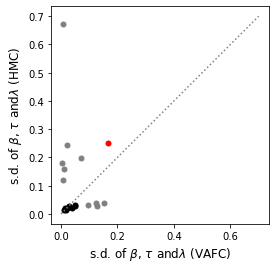

In [56]:
plt.scatter(var[0:10], std_hmc[0:10], color = 'black', s = 25)
plt.scatter(var[10:20], std_hmc[10:20], color = 'grey', s = 25)
plt.scatter(var[20], std_hmc[20], color = 'red', s = 25)
plt.plot([0,.7], [0,.7], color = 'grey', linestyle = ':')
plt.xlabel(str('s.d. of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' '$\lambda$ (VAFC)'), fontsize=12)
plt.ylabel(str('s.d. of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' '$\lambda$ (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CPL_Horseshoe_sd.pdf', dpi = 600, bbox_inches='tight') 

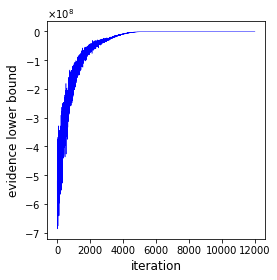

In [57]:
fig, ax = plt.subplots()
ax.plot(lower_bounds[0:12000], color = 'blue', linewidth = '0.5')
#ax.set_yscale('symlog')
ax.set_ylabel('evidence lower bound', fontsize = 12)
ax.set_xlabel('iteration', fontsize=12)
ax.set_box_aspect(1)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.major.formatter._useMathText = True
plt.savefig('../../data/commaai/accuracy/CPL_Horseshoe_convergence.pdf', dpi = 600, bbox_inches='tight') 

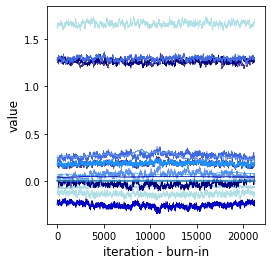

In [58]:
colors = ['azure', 'powderblue', 'darkblue', 'darkslateblue', 'lightblue', 'navy', 'dodgerblue', 'royalblue', 'mediumblue', 'cornflowerblue']
fig, ax = plt.subplots()
for i in range(0,10):
    ax.plot(all_thetas[5000:,i], color = colors[i], linewidth = 0.5)
for i in range(10,20):
    ax.plot(all_thetas2[5000:,i], color = colors[i - 10], linewidth = 0.5)
ax.plot(np.exp(all_thetas[5000:,10]))
ax.set_box_aspect(1)
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('iteration - burn-in', fontsize=12)
plt.savefig('../../data/commaai/accuracy/CPL_Horseshoe_hmc_convergence.pdf', dpi = 600, bbox_inches='tight') 

In [59]:
## CIL Horseshoe

In [60]:
# load HMC results
all_thetas = np.load('../../data/commaai/mcmc/unfiltered_gaussian_resampled/Horseshoe/all_thetas_try.npy')
# load VA results
lower_bounds = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Horseshoe/lower_bounds2_new_dev.npy')
mu_ts = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Horseshoe/mu_ts2_new_dev.npy')
B_ts = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Horseshoe/B_ts2_new_dev.npy')
d_ts = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Horseshoe/d_ts2_new_dev.npy')

In [61]:
# take last 1% of VA results
iterations = len(lower_bounds)
mu_t = np.mean(mu_ts[int(0.9*iterations):iterations,:], axis = 0)
B_t = np.mean(B_ts[int(0.9*iterations):iterations,:], axis = 0)
d_t = np.mean(d_ts[int(0.9*iterations):iterations,:], axis = 0)
var = np.sqrt(np.diag(B_t.dot(B_t.T) + d_t**2))
samples_lambda = np.exp(0.5*np.random.multivariate_normal(mu_t[10:20].reshape(10,), np.diag(var[10:20]), 100000))
samples_tau = np.exp(np.random.normal(mu_t[20], var[20], 100000))
#var[10] = np.std(samples_tau)
mu_t[10:20] = np.mean(samples_lambda, axis = 0).reshape(10,1)
mu_t[20] = np.mean(samples_tau)
var[10:20] = np.std(samples_lambda, axis = 0).reshape(10)
var[20] = np.std(samples_tau)
# take results for HMC after burnin
burnin = 500
# transform log tau
all_thetas2 = all_thetas.copy()
all_thetas2[:,20] = np.exp(all_thetas[:,20])
all_thetas2[:,10:20] = np.exp(0.5*all_thetas[:,10:20])
mu_hmc = np.mean(all_thetas2[burnin:,:], axis = 0)
std_hmc = np.std(all_thetas[burnin:,:], axis = 0)

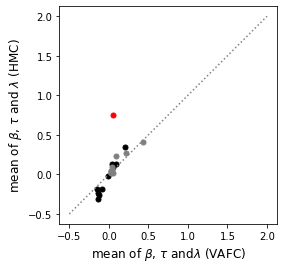

In [62]:
plt.scatter(mu_t[0:10], mu_hmc[0:10], color = 'black', s = 25)
plt.scatter(mu_t[10:20], mu_hmc[10:20], color = 'grey', s = 25)
plt.scatter(mu_t[20], mu_hmc[20], color = 'red', s = 25)
plt.plot([-.5,2], [-.5,2], color = 'grey', linestyle = ':')
plt.xlabel(str('mean of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' '$\lambda$ (VAFC)'), fontsize=12)
plt.ylabel(str('mean of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' + ' $\lambda$ (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CIL_Horseshoe_means.pdf', dpi = 600, bbox_inches='tight') 

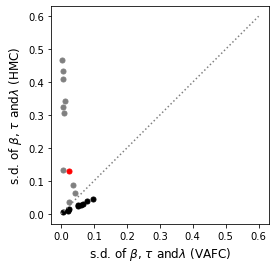

In [63]:
plt.scatter(var[0:10], std_hmc[0:10], color = 'black', s = 25)
plt.scatter(var[10:20], std_hmc[10:20], color = 'grey', s = 25)
plt.scatter(var[20], std_hmc[20], color = 'red', s = 25)
plt.plot([0,.6], [0,.6], color = 'grey', linestyle = ':')
plt.xlabel(str('s.d. of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' '$\lambda$ (VAFC)'), fontsize=12)
plt.ylabel(str('s.d. of ' + r'$\beta$' + ', ' + r'$\tau$ ' + 'and' '$\lambda$ (HMC)'), fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('../../data/commaai/accuracy/CIL_Horseshoe_sd.pdf', dpi = 600, bbox_inches='tight') 

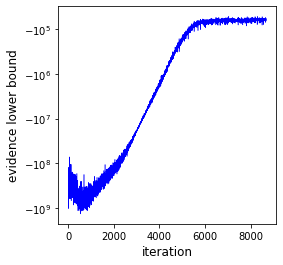

In [64]:
fig, ax = plt.subplots()
ax.plot(lower_bounds[:], color = 'blue', linewidth = '0.5')
ax.set_yscale('symlog')
ax.set_ylabel('evidence lower bound', fontsize = 12)
ax.set_xlabel('iteration', fontsize=12)
ax.set_box_aspect(1)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.major.formatter._useMathText = True
plt.savefig('../../data/commaai/accuracy/CIL_Horseshoe_convergence.pdf', dpi = 600, bbox_inches='tight') 

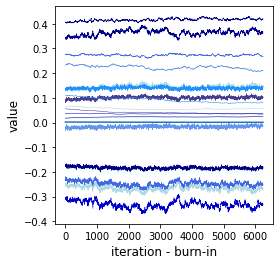

In [65]:
colors = ['azure', 'powderblue', 'darkblue', 'darkslateblue', 'lightblue', 'navy', 'dodgerblue', 'royalblue', 'mediumblue', 'cornflowerblue']
fig, ax = plt.subplots()
for i in range(0,10):
    ax.plot(all_thetas[2000:,i], color = colors[i], linewidth = 0.5)
for i in range(10,20):
    ax.plot(all_thetas2[2000:,i], color = colors[i - 10], linewidth = 0.5)
ax.plot(np.exp(all_thetas[2000:,10]))
ax.set_box_aspect(1)
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('iteration - burn-in', fontsize=12)
plt.savefig('../../data/commaai/accuracy/CIL_Horseshoe_hmc_convergence.pdf', dpi = 600, bbox_inches='tight') 